In [1]:
from pymeasure import instruments, adapters


In [4]:
lockin = instruments.srs.SR830('GPIB0::23::INSTR')

In [48]:
lockin.\

1.61194e-05

In [9]:
dir(lockin)

['CHANNELS',
 'EXPANSION_VALUES',
 'FILTER_SLOPES',
 'INPUT_CONFIGS',
 'INPUT_COUPLINGS',
 'INPUT_GROUNDINGS',
 'INPUT_NOTCH_CONFIGS',
 'REFERENCE_SOURCES',
 'RESERVE_VALUES',
 'SAMPLE_FREQUENCIES',
 'SCPI',
 'SENSITIVITIES',
 'TIME_CONSTANTS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'adapter',
 'adc1',
 'adc2',
 'adc3',
 'adc4',
 'aquireOnTrigger',
 'ask',
 'auto_gain',
 'auto_offset',
 'auto_phase',
 'auto_reserve',
 'aux_in_1',
 'aux_in_2',
 'aux_in_3',
 'aux_in_4',
 'aux_out_1',
 'aux_out_2',
 'aux_out_3',
 'aux_out_4',
 'binary_values',
 'buffer_count',
 'buffer_measure',
 'channel1',
 'channel2',
 'check_errors',
 'clear',
 'complete',
 'control',
 'dac1'

In [18]:
lockin.

0.001

In [42]:
lockin.get_buffer(end=0.001)

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [45]:
for i in range(1000):
    print(lockin.magnitude)

0.000133188
0.000133426
0.000133575
0.000133545
0.000133575
0.000133575
0.000133575
0.000133575
0.000133575
0.000133605
0.000133605
0.000133605
0.000133635
0.000133605
0.000133664
0.000133664
0.000133664
0.000133664
0.000133635
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133754
0.000134052
0.00013432
0.000134499
0.000134648
0.000134856
0.000135035
0.000135363
0.000135721
0.00013578
0.00013578
0.00013578
0.00013578
0.00013581
0.00013578
0.00013578
0.00013578
0.000135751
0.000135721
0.000135154
0.000134976
0.000134797
0.000134707
0.000134648
0.000134618
0.000134558
0.00013438
0.000134171
0.000133962
0.000133813
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133635
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.000133664
0.

KeyboardInterrupt: 

In [1]:
import pyvisa as visa


In [2]:
visa.ResourceManager().list_resources()

('ASRL3::INSTR', 'GPIB0::23::INSTR')

In [1]:
from pymeasure import instruments
lockin = instruments.srs.SR830('GPIB0::23::INSTR')

In [21]:
lockin.buffer_measure

ValueError: invalid literal for int() with base 10: '1.62051e-007\n'

In [55]:
d = lockin.get_buffer(end=100)
lockin.clear

In [47]:
lockin.magnitude

0.000132353

In [59]:
lockin.get_buffer(end=10)

array([ 9.6858003e-08,  8.1956841e-08,  1.0989652e-07, -8.5682132e-08,
       -2.6077214e-07, -8.1956841e-08,  1.1734710e-07,  2.0489188e-07,
        9.1270067e-08, -6.5193035e-08], dtype=float32)

In [59]:
d.shape
import matplotlib.pyplot as plt

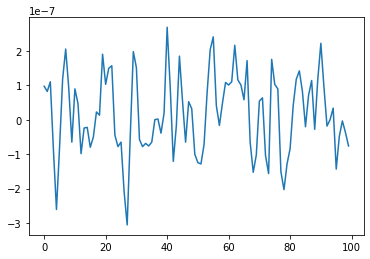

KeyboardInterrupt: 

In [63]:
fig, ax = plt.subplots()
# The time vector is fixed. No need to read it on every iteration.
N = 100
line, = ax.plot(lockin.get_buffer(end=N))



while True:

    plt.pause(0.1)

while True:
    line.set_ydata(lockin.get_buffer(end=N))

    # ax.set_ylim(np.min(y), np.max(y))
    plt.pause(0.1)


In [65]:
import time
import pyvisa
from pymeasure import instruments
import matplotlib.pyplot as plt

class LockInAmplifier(instruments.srs.SR830):
    def __init__(self, **kwargs):
        rm = pyvisa.ResourceManager()
        rs_list = rm.list_resources()
        found = False
        for rs in rs_list:
            if rs.startswith('GPIB0::') and rs.endswith('INSTR'):
                super(LockInAmplifier, self).__init__(rs, **kwargs)
                print('Lock-in Amplifier is found on {}:'.format(rs), self.id)
                found = True
                break
        if not found:
            print('Lock-in Amplifier is not found!')

        self.cache = []

    def get_data_with_time(self, interval=1e-3, num=100):
        self.cache.clear()
        for _ in range(num):
            time.sleep(interval)
            self.cache.append(self.magnitude)
        return self.cache


In [61]:
lockin = LockInAmplifier()

Lock-in Amplifier is found on GPIB0::23::INSTR: Stanford_Research_Systems,SR830,s/n35577,ver1.03


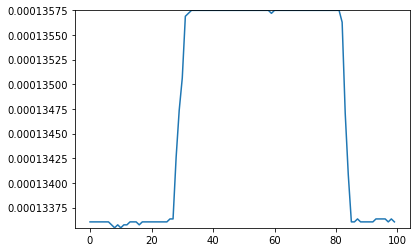

KeyboardInterrupt: 

In [71]:
fig, ax = plt.subplots()
# The time vector is fixed. No need to read it on every iteration.
N = 100
line, = ax.plot(lockin.get_data_with_time())

while True:
    y=lockin.get_data_with_time()
    line.set_ydata(y)

    ax.set_ylim(np.min(y), np.max(y))
    plt.pause(0.5)


In [69]:
import numpy as np
for i in range(3):
    np.savetxt('{}.txt'.format(i), lockin.get_data_with_time())